In [366]:
from typing import Tuple

import matplotlib.pyplot as plot
import numpy
import pandas as pd
import seaborn
from scipy.stats import (
    mode as stats_mode,
)
from strenum import StrEnum

In [367]:
class PlotType(StrEnum):
    histogram: str = "histogram"
    scatter: str = "scatter"
    boxplot: str = "boxplot"
    pie: str = "pie"


class DatasetType(StrEnum):
    normal: str = "normal"
    uniform: str = "uniform"
    
# Анализ датасета: среднее, медиана, мода
def calc_dataset(data):
    mean = numpy.mean(data)
    median = numpy.median(data)

    mode_result = stats_mode(data, nan_policy="omit")
    mode = mode_result[0]

    return mean, median, mode


In [368]:
# Отрисовка графиков датасетов
def render_dataset(data: numpy.ndarray, plot_type: PlotType = PlotType.histogram, x_label: str = "", y_label: str = "", title:str = "",) -> None:
    seaborn.set_style("dark")
    seaborn.set_palette("muted")
    plot.figure(figsize=(10, 5))

    if plot_type == PlotType.histogram:
        # plot.hist(data, bins=20, color="#0078d4", edgecolor="black")
        seaborn.histplot(data, kde=True, color="#0078d4", bins=30)
        plot.title(title, fontsize=16)
    elif plot_type == PlotType.scatter:
        plot.scatter(x=range(len(data)), y=data, color="#0078d4", alpha=0.6)
        plot.title(title, fontsize=16)
    elif plot_type == PlotType.boxplot:
        seaborn.boxplot(data=data, color="#0078d4")
        plot.title(f"Диаграмма размаха «ящик с усами»{', ' if title else ''}{title}", fontsize=16)
    elif plot_type == PlotType.pie:
        plot.pie(data, labels=data.index, autopct="%1.1f%%", colors=seaborn.color_palette("Set1"))
        plot.title(title, fontsize=16)
    else:
        raise ValueError("Неверный тип графика. Допустимые значения: histogram, scatter, boxplot, pie.")

    plot.xlabel(x_label, fontsize=14)
    plot.ylabel(y_label, fontsize=14)
    plot.tight_layout()
    plot.show()
    

In [369]:
def analyze_dataset(data: numpy.ndarray, title: str) -> None:
    mean, median, mode = calc_dataset(data)    

    print(f"\n{title}")
    print(f"Среднее: {mean:.4f}")
    print(f"Медиана: {median:.4f}")    
    if isinstance(mode, (int, float)):
        print(f"Мода: {mode:.4f}")
    else:
        print(f"Мода: {mode}")

    # Статистические показатели
    q1 = numpy.percentile(data, 25)
    q3 = numpy.percentile(data, 75)
    iqr = q3 - q1  # Межквартильный интервал
    variance = numpy.var(data)  # Дисперсия
    std_dev = numpy.std(data)  # Стандартное отклонение
    median_mean_diff = abs(median - mean)
    relative_shift = (median_mean_diff / std_dev) * 100  # Используем стандартное отклонение

    print(f"Первый квартиль (Q1): {q1:.4f}")
    print(f"Третий квартиль (Q3): {q3:.4f}")
    print(f"Межквартильный интервал (IQR): {iqr:.4f}")
    print(f"Размах: {numpy.max(data) - numpy.min(data):.4f}")
    print(f"Дисперсия: {variance:.4f}")
    print(f"Стандартное отклонение: {std_dev:.4f}")
    print(f"Относительное смещение медианы от среднего: {relative_shift:.2f}%")    

    # Визуализируем гистограмму распределения
    plot.figure(figsize=(12, 6))
    seaborn.histplot(data, kde=True, color="skyblue", bins=30)
    plot.axvline(mean, color="red", linestyle="--", label="Среднее")
    plot.axvline(median, color="green", linestyle="--", label="Медиана")
    plot.title(title, fontsize=16)
    plot.xlabel("Значение", fontsize=14)
    plot.ylabel("Частота", fontsize=14)
    plot.legend(fontsize=12)
    plot.tight_layout()
    plot.show()

    # Диаграмма размаха
    render_dataset(data=data, plot_type=PlotType.boxplot, x_label="", y_label="Значение", title=title) 
    

Часть 1.

Анализ данных роста мужчин (нормальное распределение)

In [370]:
# Загрузка данных
data = pd.read_csv("../datasets/weight-height.csv")
data["Height"] *= 2.54
data["Weight"] /= 2.205

data_male = data[data["Gender"] == "Male"].copy()
heights_male = data_male["Height"].dropna()
weights_male = data_male["Weight"].dropna()

# data_female = data[data["Gender"] == "Female"].copy()
# heights_female = data_female["Height"].dropna()
# weights_female = data_female["Weight"].dropna()

Визуализация данных

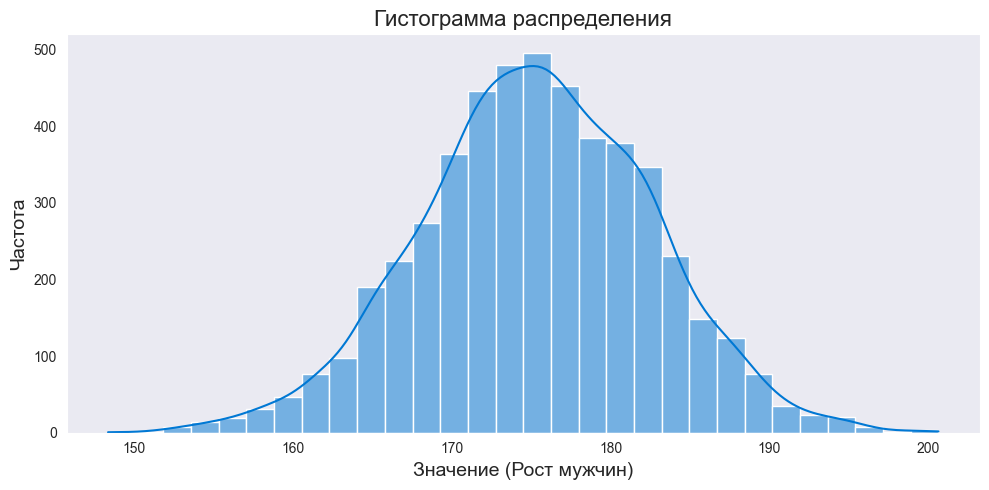

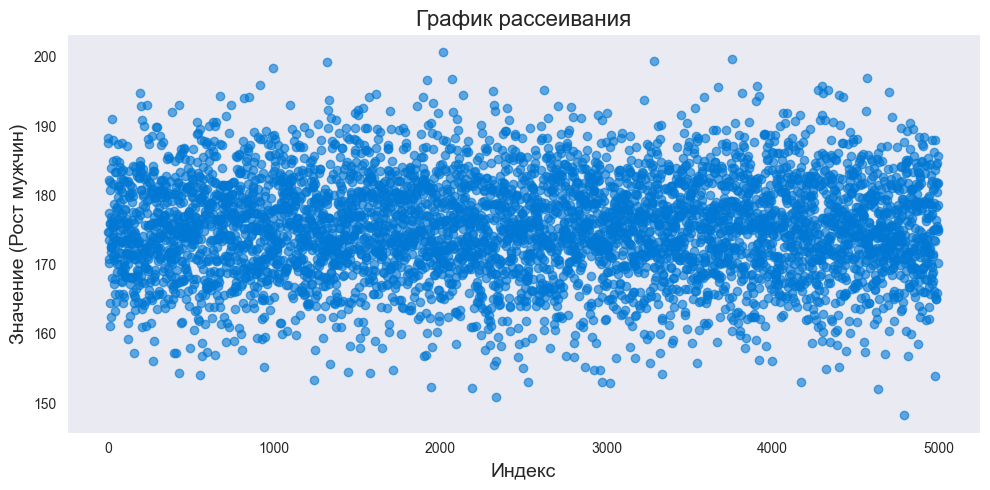

In [371]:
render_dataset(heights_male, PlotType.histogram, "Значение (Рост мужчин)", "Частота", "Гистограмма распределения")
render_dataset(heights_male, PlotType.scatter, "Индекс", "Значение (Рост мужчин)", "График рассеивания")

Анализ данных


Рост мужчин
Среднее: 175.3269
Медиана: 175.3304
Мода: 148.3535
Первый квартиль (Q1): 170.6237
Третий квартиль (Q3): 180.3114
Межквартильный интервал (IQR): 9.6877
Размах: 52.3033
Дисперсия: 52.8851
Стандартное отклонение: 7.2722
Относительное смещение медианы от среднего: 0.05%


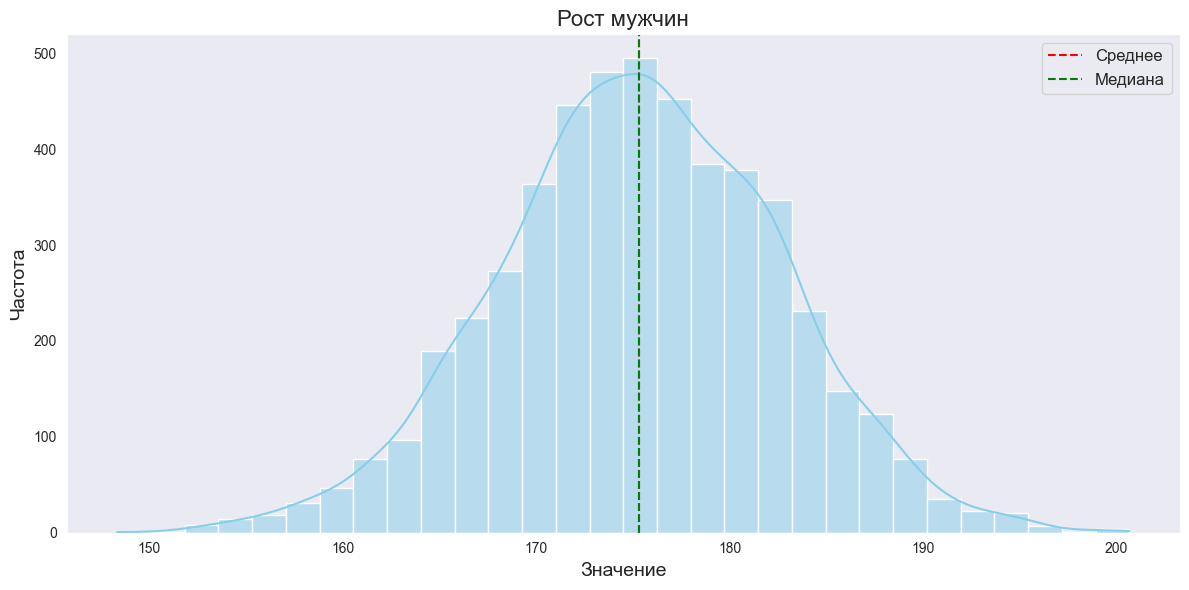

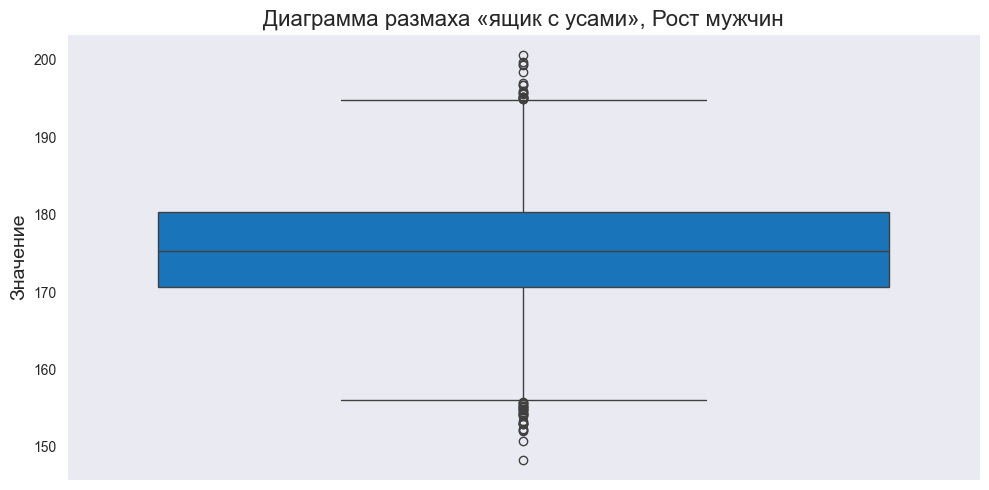

In [372]:
analyze_dataset(data=heights_male, title="Рост мужчин")

Круговая диаграмма

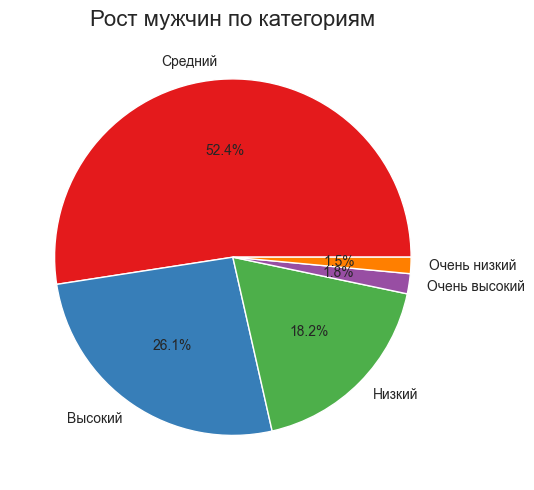

In [373]:
heights_male_categories = pd.cut(
    heights_male, bins=5, labels=["Очень низкий", "Низкий", "Средний", "Высокий", "Очень высокий"]
)
weight_category_counts = heights_male_categories.value_counts()

render_dataset(weight_category_counts, PlotType.pie, "", "", "Рост мужчин по категориям")

Часть 1.1 (равномерное распределение, сгененрированные данные) 

In [374]:
def create_uniform_dataset(size: int = 800, noise_value: float = 0.1, outliers_pc: float = 0.05):
    result_data = numpy.random.uniform(low=-1, high=1, size=size)
    
    # Добавляем шум к данным
    noise = numpy.random.normal(0, noise_value, size)
    result_data += noise

    # Добавляем выбросы в данные
    outliers_count = int(size * outliers_pc)
    outliers_indices = numpy.random.choice(size, outliers_count, replace=False)
    result_data[outliers_indices] += numpy.random.uniform(2, 5, outliers_count) * numpy.sign(
        result_data[outliers_indices]
    )

    return result_data

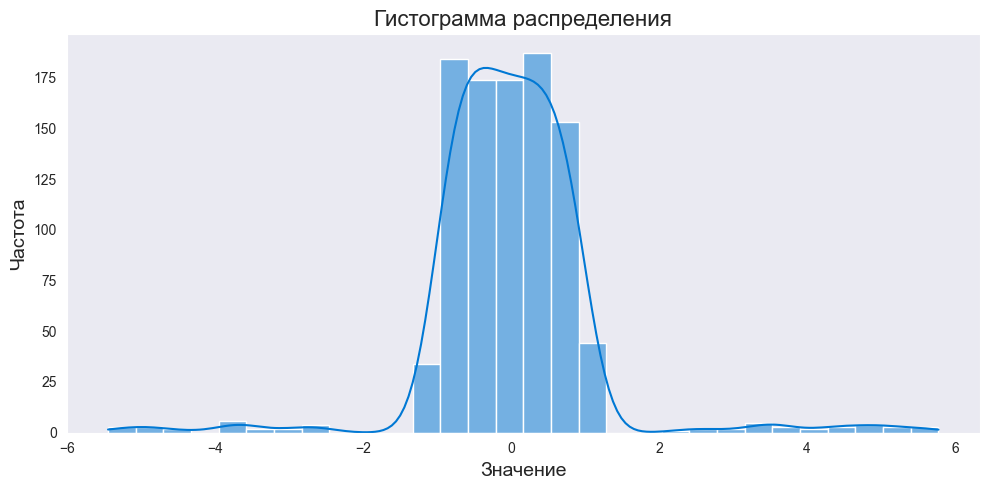

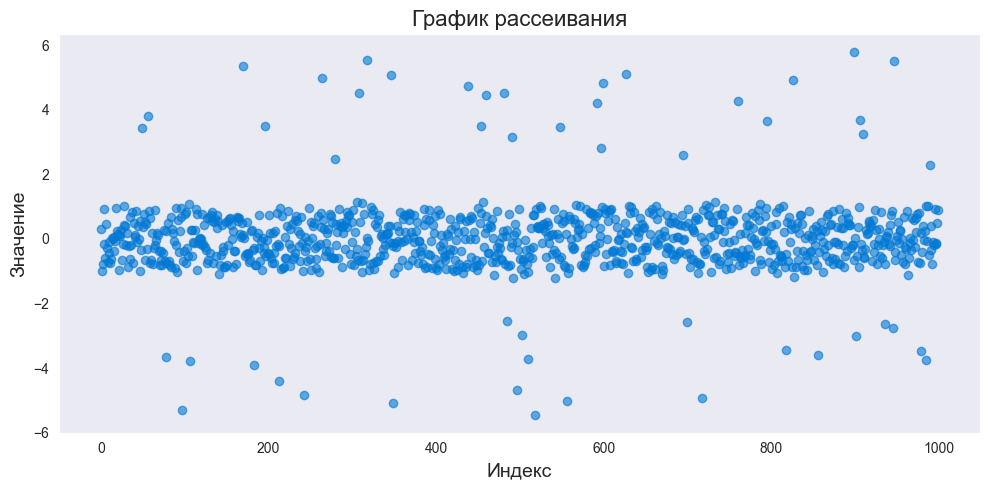


Равномерное распределение
Среднее: 0.0019
Медиана: -0.0347
Мода: -5.4421
Первый квартиль (Q1): -0.5565
Третий квартиль (Q3): 0.4896
Межквартильный интервал (IQR): 1.0461
Размах: 11.2167
Дисперсия: 1.1784
Стандартное отклонение: 1.0855
Относительное смещение медианы от среднего: 3.37%


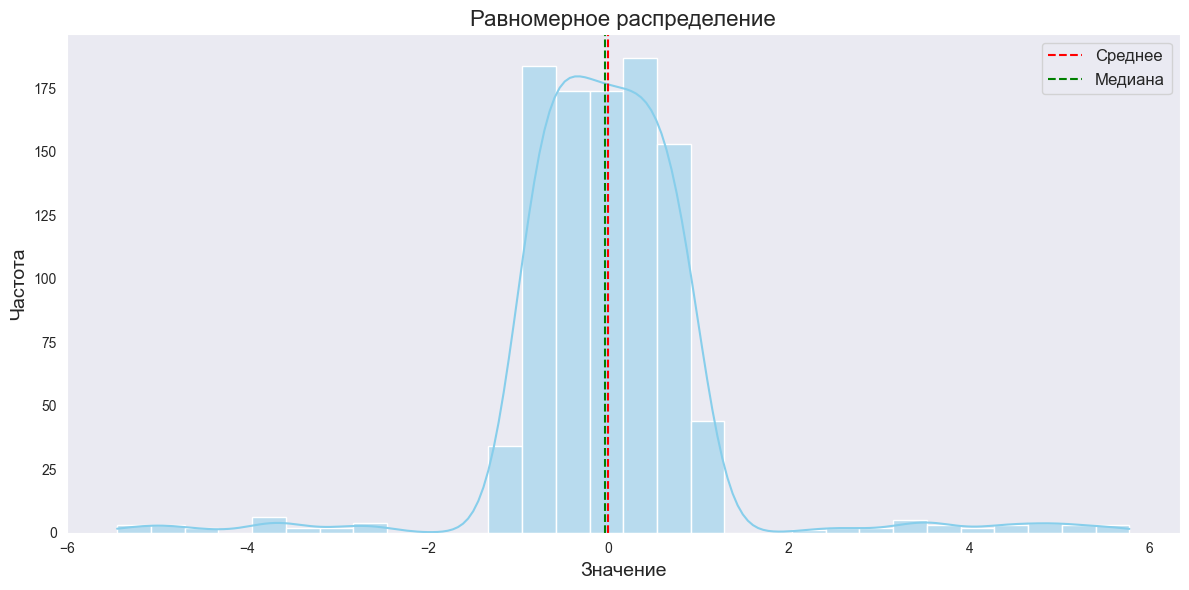

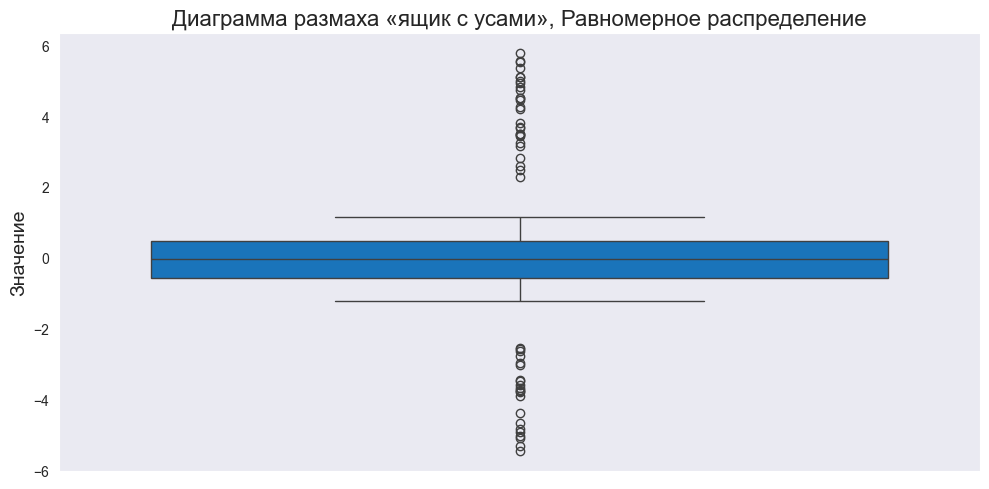

In [375]:
uniform_data = create_uniform_dataset(size=1000, noise_value= 0.1, outliers_pc=0.05)
render_dataset(uniform_data, PlotType.histogram, "Значение", "Частота", "Гистограмма распределения")
render_dataset(uniform_data, PlotType.scatter, "Индекс", "Значение", "График рассеивания")

analyze_dataset(data=uniform_data, title="Равномерное распределение")

Круговая диаграмма (равномерное распределение, сгененрированные данные)

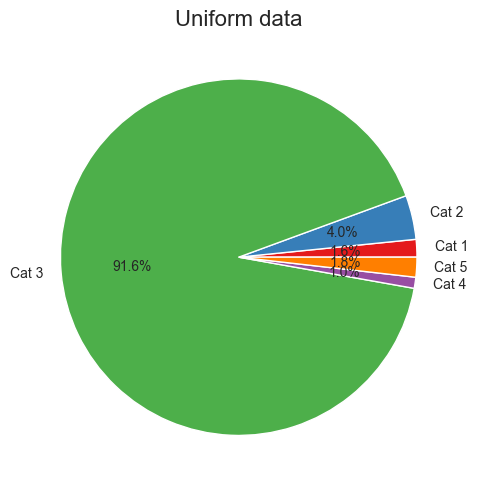

In [376]:
uni_categories = pd.cut(
    uniform_data, bins=5, labels=["Cat 1", "Cat 2", "Cat 3", "Cat 4", "Cat 5"]
)
uni_category_counts = uni_categories.value_counts()

render_dataset(uni_category_counts, PlotType.pie, "", "", "Uniform data")

Часть 2. Данные с аномалиями

In [377]:
def create_dataset_with_anomalies() -> Tuple[numpy.ndarray, numpy.ndarray]:
    numpy.random.seed(100)
    normal_data = numpy.random.normal(loc=0, scale=1, size=950)
    anomalies = numpy.random.uniform(low=10, high=15, size=50)
    data = numpy.concatenate([normal_data, anomalies])
    numpy.random.shuffle(data)
    
    labels = numpy.zeros(len(data))
    labels[numpy.abs(data) > 3] = 1

    return data, labels

In [378]:
data_with_anomalies, anomal_labels = create_dataset_with_anomalies()

Анализ данных c аномалиями (сгенерированные данные)

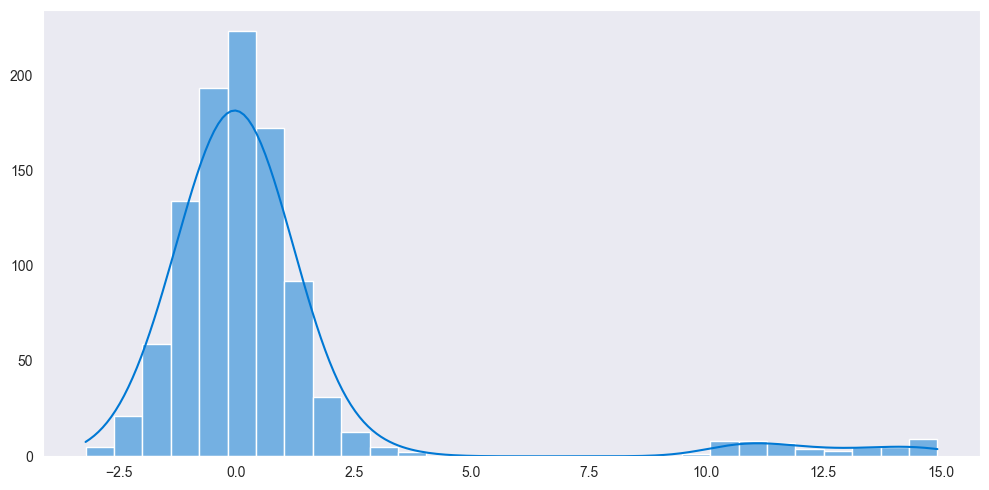

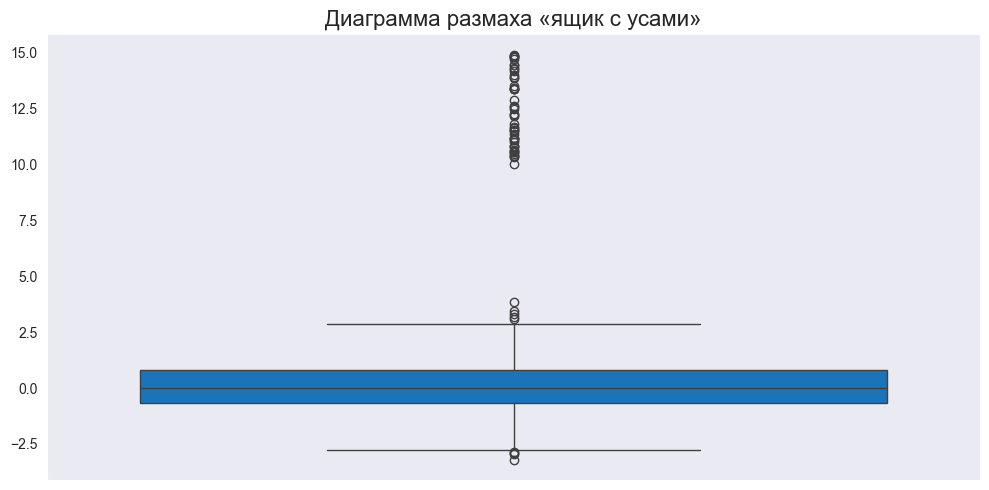

In [ ]:
# analyze_dataset(data_with_anomalies, anomal_labels)
render_dataset(data_with_anomalies)
render_dataset(data_with_anomalies, PlotType.boxplot)